In [122]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [124]:
# Load dataset
df = pd.read_csv("diabetes.csv")

In [126]:
# Check for missing values
print(df.isnull().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [128]:
# Separate features (X) and target (y)
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

In [130]:
# Apply Mutual Information
feature_selection = SelectKBest(score_func = mutual_info_classif, k = 10)
feature_selection.fit(X,y)

SelectKBest(score_func=<function mutual_info_classif at 0x000001ADCE904400>)

In [132]:
# Get scores
mutual_score = pd.Series(feature_selection.scores_, index = X.columns)
mutual_score

HighBP                  0.080764
HighChol                0.048845
CholCheck               0.012831
BMI                     0.053926
Smoker                  0.007647
Stroke                  0.008830
HeartDiseaseorAttack    0.025700
PhysActivity            0.019656
Fruits                  0.011386
Veggies                 0.011281
HvyAlcoholConsump       0.007496
AnyHealthcare           0.007381
NoDocbcCost             0.002829
GenHlth                 0.092843
MentHlth                0.004800
PhysHlth                0.029973
DiffWalk                0.043789
Sex                     0.009231
Age                     0.048411
Education               0.016999
Income                  0.031264
dtype: float64

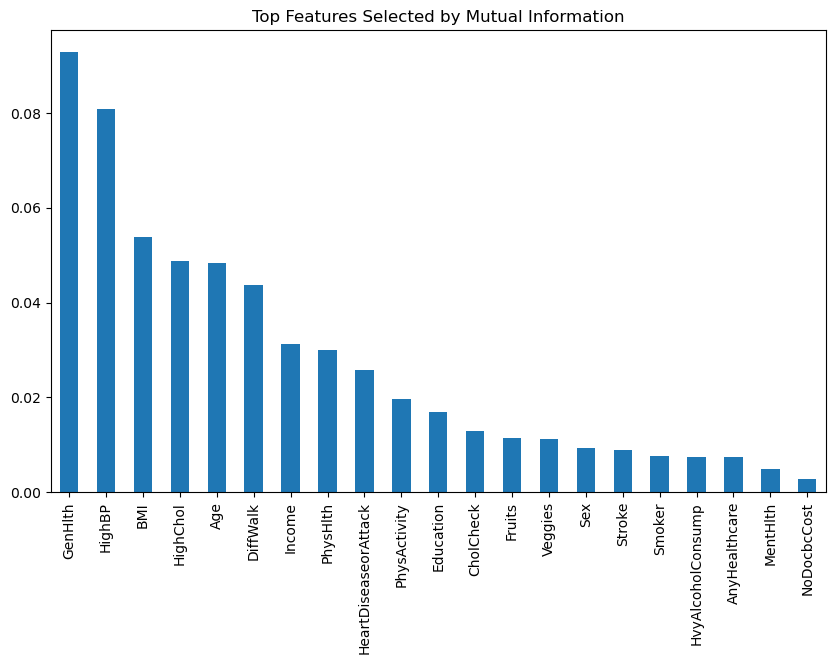

In [134]:
# Plot top features
mutual_score.sort_values(ascending = False).plot.bar(figsize = (10, 6))
plt.title("Top Features Selected by Mutual Information")
plt.show()

In [136]:
# Transform dataset
selected_columns = mutual_score.sort_values(ascending=False).head(10).index
X_selected = feature_selection.fit_transform(X, y)
X_selected = pd.DataFrame(X_selected, columns=selected_columns)

In [140]:
# Before selection
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [142]:
# After selection
X_selected.head()

,GenHlth,HighBP,BMI,HighChol,Age,DiffWalk,Income,PhysHlth,HeartDiseaseorAttack,PhysActivity
0,1.0,0.0,26.0,0.0,1.0,3.0,30.0,0.0,4.0,8.0
1,1.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,12.0,8.0
2,0.0,0.0,26.0,0.0,1.0,1.0,10.0,0.0,13.0,8.0
3,1.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,11.0,8.0
4,0.0,0.0,29.0,0.0,1.0,2.0,0.0,0.0,8.0,8.0
